In [0]:

from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import pandas as pd
import seaborn as sns


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn packages
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

# nltk packages
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from string import punctuation
import unidecode

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
train_df = pd.read_csv("drive/My Drive/Knight/Data/train.csv")
train_df.head()


,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
train_df['variety'].unique()

array(['Chardonnay', 'Red Blend', 'Nebbiolo',
       'Bordeaux-style White Blend', 'Malbec', 'Cabernet Sauvignon',
       'Zinfandel', 'Pinot Noir', 'Sauvignon Blanc', 'Gamay',
       'Grüner Veltliner', 'Bordeaux-style Red Blend', 'Sangiovese',
       'Syrah', 'White Blend', 'Cabernet Franc', 'Portuguese Red',
       'Portuguese White', 'Rhône-style Red Blend', 'Rosé',
       'Champagne Blend', 'Merlot', 'Riesling', 'Sparkling Blend',
       'Pinot Grigio', 'Tempranillo', 'Pinot Gris', 'Gewürztraminer'],
      dtype=object)

In [9]:
train_df['variety'].value_counts()

Pinot Noir                    10587
Chardonnay                     9403
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1448
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Gamay                       

In [8]:
train_df.isnull().sum()


user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [0]:
train_df.drop('user_name', axis=1, inplace=True)

In [5]:
train_df['province'].value_counts()

California         25736
Washington          6060
Bordeaux            4690
Oregon              3900
Tuscany             3780
                   ...  
Jidvei                 1
Elim                   1
Ticino                 1
Piekenierskloof        1
Santa Catarina         1
Name: province, Length: 358, dtype: int64

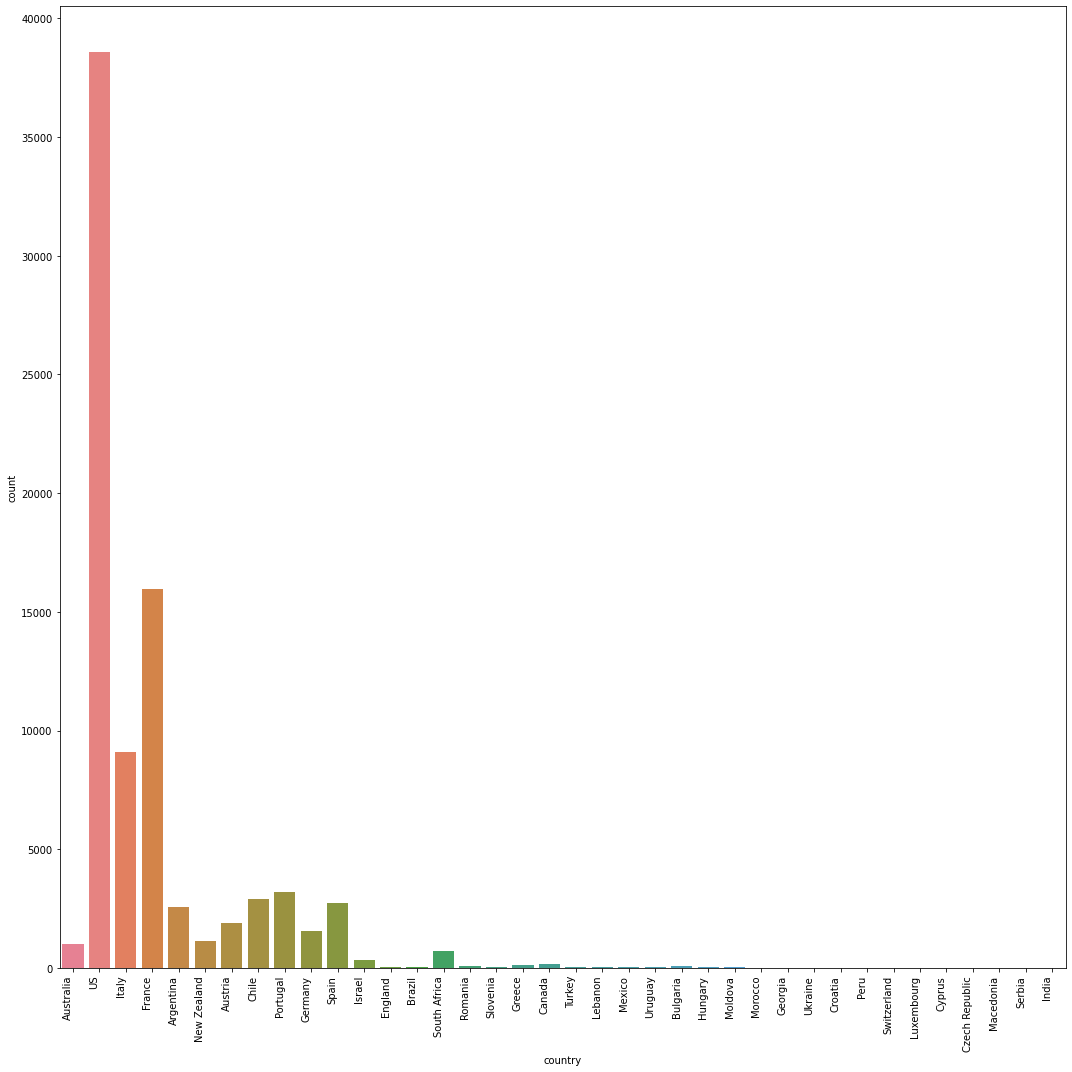

In [6]:

# Plot the frequency for every country_destination value
plt.figure(figsize=(15,15))
axx=sns.countplot(x='country', data=train_df, palette="husl")
axx.set_xticklabels(axx.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

most are from usa, france,italy

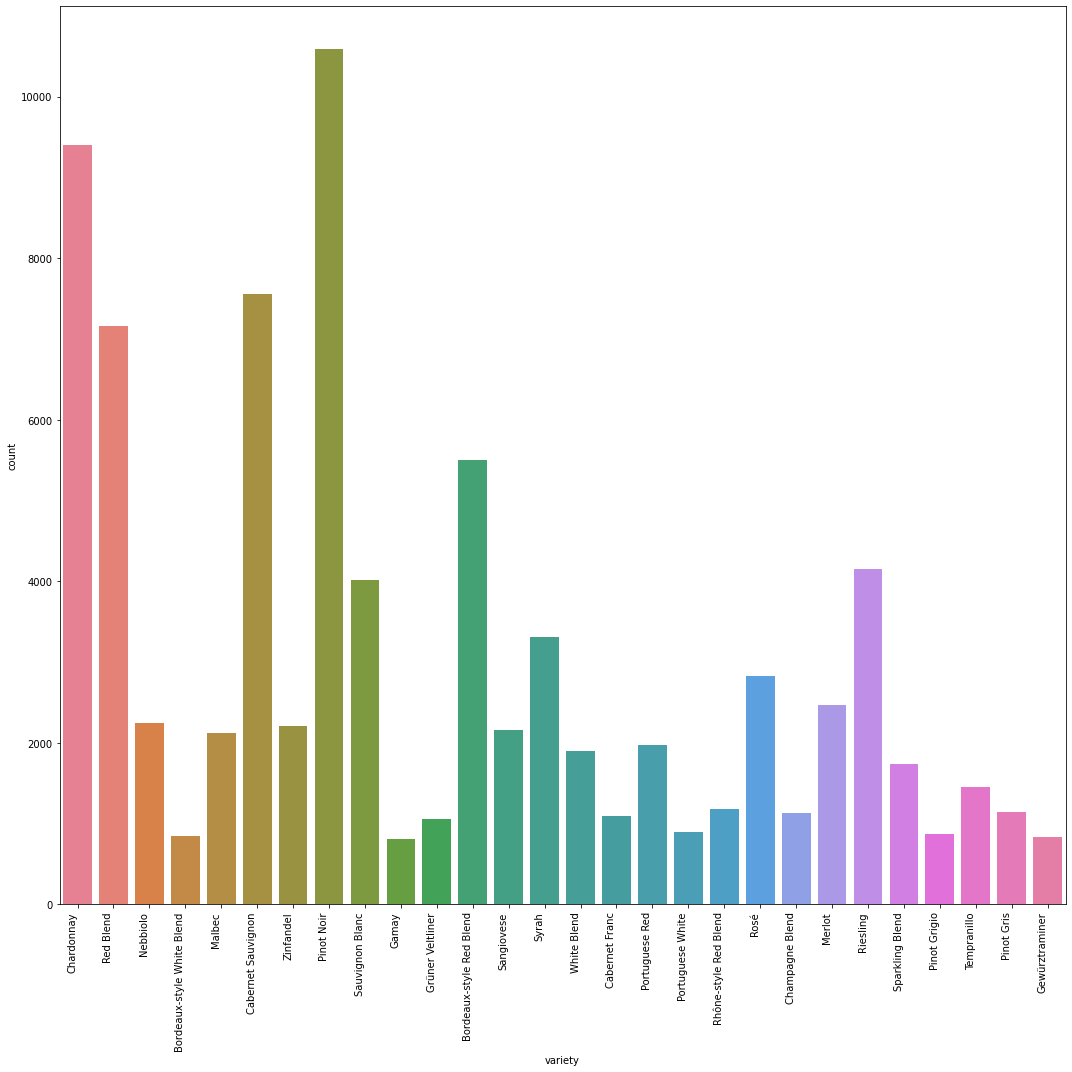

In [27]:
plt.figure(figsize=(15,15))
ax=sns.countplot(x='variety', data=train_df, palette="husl")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [14]:
train_df.dtypes

country                object
review_title           object
review_description     object
designation            object
points                  int64
price                 float64
province               object
region_1               object
region_2               object
winery                 object
variety                object
dtype: object

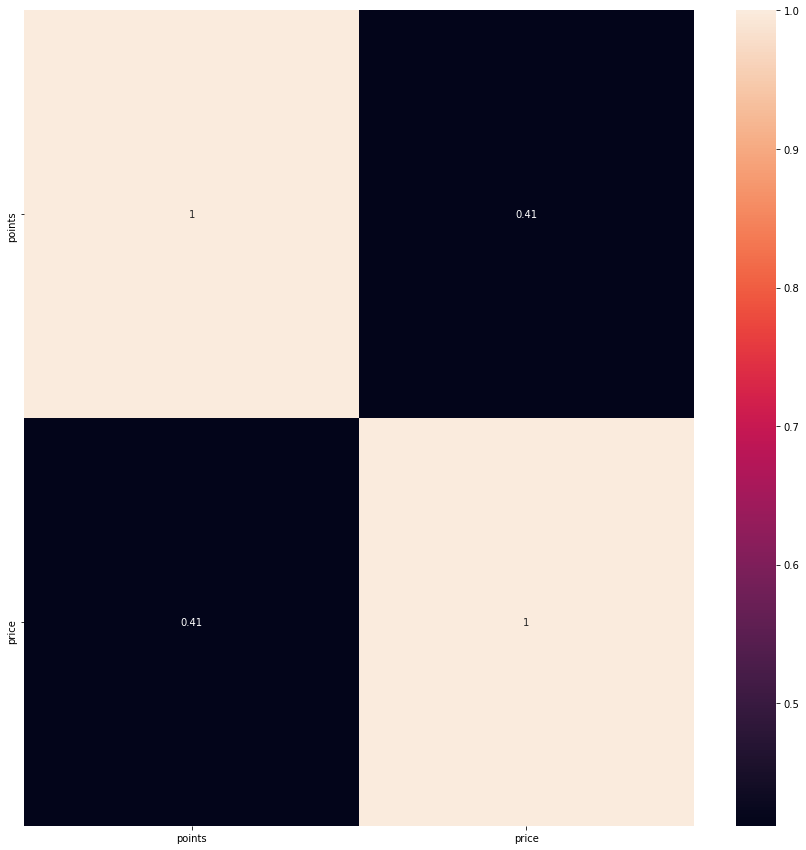

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(),color = "k", annot=True)

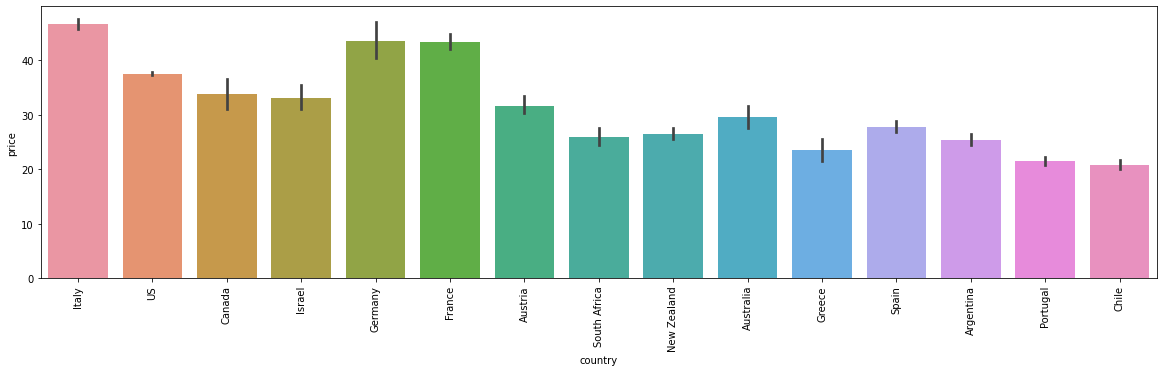

In [7]:
country=train_df.groupby('country').filter(lambda x: len(x) >100)

df3 = pd.DataFrame({col:vals['price'] for col,vals in country.groupby('country')})
meds2 = df3.median()
meds2.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,5))
chart = sns.barplot(x='country',y='price', data=country, order=meds2.index, ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [8]:
ds_cat = train_df.select_dtypes(include = 'object').copy()
ds_cat.head(2)
# categorical feat only

,country,review_title,review_description,designation,province,region_1,region_2,winery,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend


In [29]:
ds_cat.nunique()


country                  38
review_title          76983
review_description    77628
designation           26424
province                358
region_1               1019
region_2                 17
winery                13786
variety                  28
dtype: int64

In [30]:
ds_cat.isnull().sum()


country                  35
review_title              0
review_description        0
designation           23647
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

Style red Blend ,Pinot Noir  and chardonnay is expensive than other varietes >1000

In [38]:
import nltk
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
train_df.dropna(axis=0)

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
6,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",Tradition,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Gordon Estate,Red Blend
7,US,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",Monte Rosso Reserve,90,50.0,California,Sonoma County,Sonoma,Rock Wall,Zinfandel
8,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
10,US,Cuvaison 2014 Estate Grown Sauvignon Blanc (Ca...,With an alluring bouquet of fresh-cut jasmine ...,Estate Grown,90,18.0,California,Carneros,Napa-Sonoma,Cuvaison,Sauvignon Blanc
22,US,Vision Cellars 2006 Las Alturas Vineyard Pinot...,"Too big by far for a Pinot Noir, this single-v...",Las Alturas Vineyard,84,48.0,California,Santa Lucia Highlands,Central Coast,Vision Cellars,Pinot Noir
...,...,...,...,...,...,...,...,...,...,...,...
82632,US,un4seen 2009 Red blend Red (California),"Dark like a cave in color, this big red blend ...",Red blend,85,10.0,California,California,California Other,un4seen,Red Blend
82639,US,Archery Summit 2012 Red Hills Estate Pinot Noi...,"Showing a light whiff of funk, this seems a bi...",Red Hills Estate,92,85.0,Oregon,Dundee Hills,Willamette Valley,Archery Summit,Pinot Noir
82641,US,The Withers Winery 2013 Mr. Burgess Red (El Do...,"Imposing, concentrated and tannic, this Syrah-...",Mr. Burgess,92,36.0,California,El Dorado,Sierra Foothills,The Withers Winery,Rhône-style Red Blend
82642,US,Peter Cellars 2013 Estate Rosé of Pinot Noir (...,"Pinkish-gold in color, this is a faint, dry an...",Estate Rosé of,86,25.0,California,Carneros,Napa-Sonoma,Peter Cellars,Pinot Noir


In [31]:
outputs

0                        Chardonnay
1                         Red Blend
2                          Nebbiolo
3        Bordeaux-style White Blend
4                            Malbec
                    ...            
82652                   Tempranillo
82653            Cabernet Sauvignon
82654                         Gamay
82655      Bordeaux-style Red Blend
82656            Cabernet Sauvignon
Name: variety, Length: 82657, dtype: object

In [0]:
output = set()
for x in train_df['variety']:
    x = x.lower()
    x = x.split()
    for y in x:
        output.add(y)

variety_list =sorted(output)

In [29]:
variety_list

['blanc',
 'blend',
 'bordeaux-style',
 'cabernet',
 'champagne',
 'chardonnay',
 'franc',
 'gamay',
 'gewürztraminer',
 'grigio',
 'gris',
 'grüner',
 'malbec',
 'merlot',
 'nebbiolo',
 'noir',
 'pinot',
 'portuguese',
 'red',
 'rhône-style',
 'riesling',
 'rosé',
 'sangiovese',
 'sauvignon',
 'sparkling',
 'syrah',
 'tempranillo',
 'veltliner',
 'white',
 'zinfandel']

In [0]:
extras = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', 'cab',"%"]
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop.update(variety_list)
stop.update(extras)

Label Encoding the target variable @varity

In [0]:
num_words = input_df.apply(lambda x: len(x.split()))
num_words_mean, num_words_std = np.mean(num_words), np.std(num_words)

num_sentences = input_df.apply(lambda x: len(re.split( '~ ...' ,'~'.join(x.split('.')))))
num_sentences_mean = np.mean(num_sentences)

WordVectors for review descriptions

In [0]:
import keras
import tensorflow as tf

sess = tf.compat.v1.keras.backend.get_session()

tf.compat.v1.keras.backend.set_session(sess)


In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score
from sklearn.tree import DecisionTreeClassifier


In [48]:
len(vect.get_feature_names())

25842

In [0]:
input_data = train_df['review_description']
output_data = train_df['variety']

In [52]:
print ('There are %d varieties of wines in this dataset' % len(set(output_data)))

There are 28 varieties of wines in this dataset


In [53]:
labelEncoder = LabelEncoder()
output_data = labelEncoder.fit_transform(output_data)
output_data

array([ 5, 17, 11, ...,  6,  0,  3])

In [0]:
input_data = input_data.str.lower()
processed = []
# stopwords removal and subsitutions/modifications on regex 
for word in input_data.str.lower():
    processed.append(' '.join([re.sub('[0-9\W_]', '', w) for w in word.split() if not w in sw]))
input_data= processed

In [0]:
countVectorizer = CountVectorizer()
input_data = countVectorizer.fit_transform(input_data)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2) 

In [58]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=len(countVectorizer.get_feature_names())))
model.add(Dense(units=output_data.max()+1, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
66125/66125 [==============================] - 15s 224us/step - loss: 1.2517 - accuracy: 0.6373
Epoch 2/10
66125/66125 [==============================] - 15s 221us/step - loss: 0.6621 - accuracy: 0.7942
Epoch 3/10
66125/66125 [==============================] - 15s 223us/step - loss: 0.4641 - accuracy: 0.8568
Epoch 4/10
66125/66125 [==============================] - 14s 210us/step - loss: 0.3423 - accuracy: 0.8939
Epoch 5/10
66125/66125 [==============================] - 13s 193us/step - loss: 0.2581 - accuracy: 0.9206
Epoch 6/10
66125/66125 [==============================] - 13s 193us/step - loss: 0.1983 - accuracy: 0.9400
Epoch 7/10
66125/66125 [==============================] - 13s 194us/step - loss: 0.1524 - accuracy: 0.9541
Epoch 8/10
66125/66125 [==============================] - 13s 197us/step - loss: 0.1185 - accuracy: 0.9652
Epoch 9/10
66125/66125 [==============================] - 13s 193us/step - loss: 0.0918 - accuracy: 0.9732
Epoch 10/10
66125/66125 [============

In [59]:
scores = model.evaluate(X_test, y_test, verbose=1)
print ('The accuracy of the model is %s' % scores[1])

16532/16532 [==============================] - 2s 146us/step
The accuracy of the model is 0.6728768348693848


In [60]:
model.save_weights("drive/My Drive/Knight/Data/model.h5")
print("Saved model to disk")

Saved model to disk


In [62]:
train_df.head()

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [66]:
dfWineClassifier = train_df[[ 'review_description', 'price', 'variety', 'country', 'province' ]]
print(dfWineClassifier.isnull().sum())
print()


# pd.DataFrame(dfWineClassifier.variety.unique()).values

#If we're missing important values, remove the row
dfWineClassifier=dfWineClassifier.dropna(subset=['review_description', 'variety'])
print('Removed ' + str(train_df.shape[0]-dfWineClassifier.shape[0]) + ' rows with empty values.' + "\n")

review_description       0
price                 5569
variety                  0
country                 35
province                35
dtype: int64

Removed 0 rows with empty values.



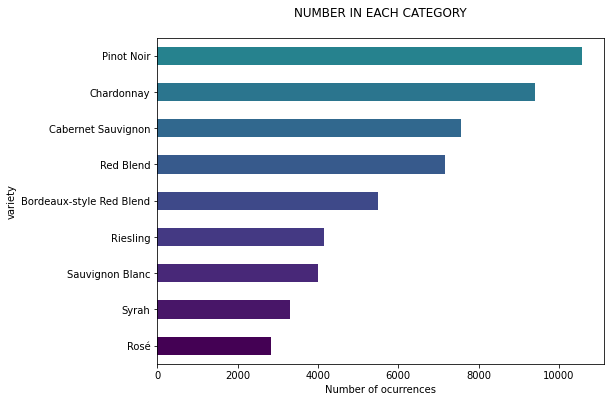

In [68]:
num_bars = 19

fig = plt.figure(figsize=(8,6))
colors = plt.cm.get_cmap('viridis', num_bars)
dfWineClassifier.groupby('variety').variety.count().sort_values()[num_bars:].plot.barh(
    ylim=0, color=colors.colors, title= 'NUMBER IN EACH CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

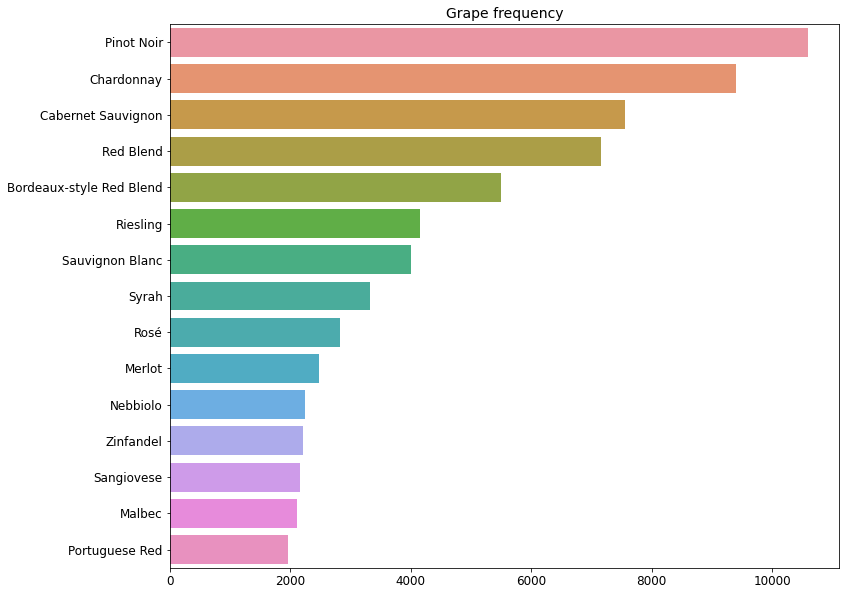

In [76]:
# Get label frequencies in descending order
label_freq = train_df['variety'].apply(lambda s: str(s)).explode().value_counts().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12,10))
sns.barplot(y=label_freq.index.values, x=label_freq, order=label_freq.iloc[:15].index)
plt.title("Grape frequency", fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [4]:
!pip install unidecode

     |████████████████████████████████| 245kB 9.1MB/s 


In [6]:
data = pd.read_csv("drive/My Drive/Knight/Data/train.csv")
data.head(5)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [0]:
data_sel = data.drop(['user_name','designation','points','region_2',], axis = 1)

user_name, designation ,point and region_2 will have no impact on prediction of grape type for wine .

In [8]:
data_sel.shape


(82657, 8)

In [0]:
data_single = data_sel.drop_duplicates('review_description')


In [11]:
data_single.shape


(77628, 8)

There were quite a few duplicates. There were either duplicates of some wines or the different vintages of the same wine had the same description. Now we have 77628 unique samples. Most of the times, these kind of data bases are not fully filled, therefore we might have some NAs in features we are interested in: description, variety (and maybe price).

In [0]:
data_single = data_single.dropna(subset=['review_description', 'variety', 'price'])

In [13]:
data_single.describe(include='all')


,country,review_title,review_description,price,province,region_1,winery,variety
count,72315,72344,72344,72344.000000,72315,61194,72344,72344
unique,38,71793,72344,NaN,351,995,13083,28
top,US,Segura Viudas NV Extra Dry Sparkling (Cava),"Pale straw in the glass, this wine has aromas ...",NaN,California,Napa Valley,Testarossa,Pinot Noir
freq,36108,7,1,NaN,24176,3147,165,9609
mean,NaN,NaN,NaN,37.138892,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,44.627663,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN


In [0]:
for col in ['variety', 'review_description', 'province', 'region_1', 'winery', 'country']:
    data_single[col] = data_single[col].str.lower()

We have left country, province, region_1 and winery in as features, because they will serve as stop words to be removed from the description column, to try to decrease the chance of having any hints in the description about grape type. The price could be used as a feature to predict grape types

In [0]:
#uni decode text 
def unidecode_text(text):
    try:
        #pdb.set_trace()
        text = unidecode.unidecode(text)
    except:
        pass
    return text

In [0]:
for col in ['review_description', 'variety', 'province', 'winery']:
    data_single[col] = data_single.apply(lambda row: unidecode_text(row[col]), axis=1)

In [0]:
filtered_name = ['red blend', 'portuguese red', 'white blend', 'sparkling blend', 'champagne blend', 
                 'portuguese white', 'rose', 'bordeaux-style red blend', 'rhone-style red blend',
                 'bordeaux-style white blend', 'alsace white blend', 'austrian red blend',
                 'austrian white blend', 'cabernet blend', 'malbec blend', 'portuguese rose',
                 'portuguese sparkling', 'provence red blend', 'provence white blend',
                 'rhone-style white blend', 'tempranillo blend', 'grenache blend',
                 'meritage' # beaurdaux blend
                ]

A blended wine refers to a mixture of different grapes (not necessarily having a concensus on what grapes are included). We find it too ambitious to have a classifier that could correctly identify these wines, therefore we simply remove those samples that are labelled blends

In [0]:
data_filtered = data_single.copy()
data_filtered = data_filtered[~data_filtered['variety'].isin(filtered_name)]

In [20]:
len(data_filtered.variety.value_counts())

18

In [21]:
data_reduced = data_filtered.groupby('variety').filter(lambda x: len(x) > 200)
data_reduced.shape

(51585, 8)

In [0]:
grapes = list(np.unique(data_reduced.variety.value_counts().index.tolist()))

In [23]:
grapes

['cabernet franc',
 'cabernet sauvignon',
 'chardonnay',
 'gamay',
 'gewurztraminer',
 'gruner veltliner',
 'malbec',
 'merlot',
 'nebbiolo',
 'pinot grigio',
 'pinot gris',
 'pinot noir',
 'riesling',
 'sangiovese',
 'sauvignon blanc',
 'syrah',
 'tempranillo',
 'zinfandel']

In [0]:
data_input = data_reduced.copy()
# data_input['colour'] = data_input.apply(lambda row: colour_map[row['variety']], axis=1)
data_dummies = pd.get_dummies(data_input['variety'])
data_input = data_input.merge(data_dummies, left_index=True, right_index=True)

In [32]:
data_input.head()

,country,review_title,review_description,price,province,region_1,winery,variety,cabernet franc,cabernet sauvignon,chardonnay,gamay,gewurztraminer,gruner veltliner,malbec,merlot,nebbiolo,pinot grigio,pinot gris,pinot noir,riesling,sangiovese,sauvignon blanc,syrah,tempranillo,zinfandel
0,australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"classic chardonnay aromas of apple, pear and h...",10.0,australia other,south eastern australia,andrew peace,chardonnay,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,italy,Renato Ratti 2007 Conca (Barolo),barolo conca opens with inky dark concentratio...,80.0,piedmont,barolo,renato ratti,nebbiolo,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,france,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"this ripe, sweet wine is rich and full of drie...",33.0,france other,vin de liqueur,chateau du cedre,malbec,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,argentina,Andean 2005 Finca La Escondida Reserva Caberne...,"strident aromas of licorice, herbs, berries an...",13.0,other,san juan,andean,cabernet sauvignon,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,us,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"high-toned red fruit stars in this wine, a nic...",50.0,california,sonoma county,rock wall,zinfandel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
data_input.reset_index(inplace=True)


In [0]:
# stop words for countries
stop_country = list(np.unique(data_input.country.dropna().str.lower().tolist()))

#stop words for province
stop_province = list(np.unique(data_input.province.dropna().str.lower().tolist()))

#stop words for winery
stop_winery = list(np.unique(data_input.winery.dropna().str.lower().tolist()))

In [0]:
stop_words = stopwords.words('english')
stop_append = ['.', ',', '`', '"', "'", '!', ';', 'wine', 'fruit', '%', 'flavour', 'aromas', 'palate']
stop_words1 = stop_words + stop_append + grapes + stop_country + stop_province + stop_winery

In [0]:
defTags = ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJS', 'JJR']#, 'RB', 'RBS', 'RBR', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

# functions to determine the type of a word
def is_noun(tag):
    return tag in ['NN', 'NNS', 'NNP', 'NNPS']


def is_verb(tag):
    return tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']


def is_adverb(tag):
    return tag in ['RB', 'RBR', 'RBS']


In [0]:
def is_adjective(tag):
    return tag in ['JJ', 'JJR', 'JJS']

# transform tag forms
def penn_to_wn(tag):
    if is_adjective(tag):
        return nltk.stem.wordnet.wordnet.ADJ
    elif is_noun(tag):
        return nltk.stem.wordnet.wordnet.NOUN
    elif is_adverb(tag):
        return nltk.stem.wordnet.wordnet.ADV
    elif is_verb(tag):
        return nltk.stem.wordnet.wordnet.VERB
    return nltk.stem.wordnet.wordnet.NOUN
    

In [0]:
# lemmatizer + tokenizer + stemmingclass
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        # we define (but not use) a stemming method, uncomment the last line in __call__ to get stemming tooo
        self.stemmer = nltk.stem.SnowballStemmer('english') 
    def __call__(self, doc):
        # pattern for numbers | words of length=2 | punctuations | words of length=1
        pattern = re.compile(r'[0-9]+|\b[\w]{2,2}\b|[%.,_`!"&?\')({~@;:#}+-]+|\b[\w]{1,1}\b')
        # tokenize document
        doc_tok = word_tokenize(doc)
        #filter out patterns from words
        doc_tok = [x for x in doc_tok if x not in stop_words1]
        doc_tok = [pattern.sub('', x) for x in doc_tok]
        # get rid of anything with length=1
        doc_tok = [x for x in doc_tok if len(x) > 1]
        # position tagging
        doc_tagged = nltk.pos_tag(doc_tok)
        # selecting nouns and adjectives
        doc_tagged = [(t[0], t[1]) for t in doc_tagged if t[1] in defTags]
        # preparing lemmatization
        doc = [(t[0], penn_to_wn(t[1])) for t in doc_tagged]
        # lemmatization
        doc = [self.wnl.lemmatize(t[0], t[1]) for t in doc]
        # uncomment if you want stemming as well
        #doc = [self.stemmer.stem(x) for x in doc]
        return doc

In [0]:
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # returns the input as a dataframe
        return X[[self.key]]

In [0]:
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None, *parg, **kwarg):
        return self

    def transform(self, X):
        # returns the input as a string
        return X[self.key]

In [0]:
vec_tdidf = TfidfVectorizer(ngram_range=(1,1), analyzer='word', #stop_words=stop_words1, 
                                               norm='l2', tokenizer=LemmaTokenizer())

Word vectorizer TF IDF

In [0]:
clf = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7,max_depth=3,n_estimators= 300)

In [0]:
def print_stats(preds, target, labels, sep='-', sep_len=40, fig_size=(10,8)):
    print('Accuracy = %.3f' % metrics.accuracy_score(target, preds))
    print(sep*sep_len)
    print('Classification report:')
    print(metrics.classification_report(target, preds))
    print(sep*sep_len)
    print('Confusion matrix')
    cm=metrics.confusion_matrix(target, preds)
    cm = cm / np.sum(cm, axis=1)[:,None]
    sns.set(rc={'figure.figsize':fig_size})
    sns.heatmap(cm, 
        xticklabels=labels,
        yticklabels=labels,
           annot=True, cmap = 'YlGnBu')
    plt.pause(0.05)

In [0]:
text = Pipeline([
                ('selector', TextSelector(key='review_description')),
                ('vectorizer', vec_tdidf)
                ])

Pipeline 

In [0]:
feats = FeatureUnion([('review_description', text),
                    
                      ])

In [0]:
pipe = Pipeline([('feats', feats),
                 ('clf',clf)
                 ])



In [79]:
pipe.named_steps['clf'].get_params()


{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 300,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 2,
 'silent': None,
 'subsample': 0.7,
 'verbosity': 1}

Hyper parameters

In [0]:
# split the data into train and test
feature = ['review_description']
target = 'variety'

X_train, X_test, y_train, y_test = train_test_split(data_input[feature], data_input[target], 
                                                    test_size=0.33, random_state=42, stratify=data_input[target])

In [73]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'feats', 'clf', 'feats__n_jobs', 'feats__transformer_list', 'feats__transformer_weights', 'feats__verbose', 'feats__review_description', 'feats__review_description__memory', 'feats__review_description__steps', 'feats__review_description__verbose', 'feats__review_description__selector', 'feats__review_description__vectorizer', 'feats__review_description__selector__key', 'feats__review_description__vectorizer__analyzer', 'feats__review_description__vectorizer__binary', 'feats__review_description__vectorizer__decode_error', 'feats__review_description__vectorizer__dtype', 'feats__review_description__vectorizer__encoding', 'feats__review_description__vectorizer__input', 'feats__review_description__vectorizer__lowercase', 'feats__review_description__vectorizer__max_df', 'feats__review_description__vectorizer__max_features', 'feats__review_description__vectorizer__min_df', 'feats__review_description__vectorizer__ngram_range', 'feats__review_description

In [81]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('feats',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('review_description',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  TextSelector(key='review_description')),
                                                                 ('vectorizer',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                                                  encodin

In [0]:
prediction = pipe.predict(X_test)

Accuracy = 0.646
----------------------------------------
Classification report:
                    precision    recall  f1-score   support

    cabernet franc       0.33      0.78      0.46       139
cabernet sauvignon       0.72      0.63      0.67      2681
        chardonnay       0.92      0.63      0.75      4035
             gamay       0.33      0.49      0.39       134
    gewurztraminer       0.40      0.73      0.51       132
  gruner veltliner       0.56      0.79      0.65       194
            malbec       0.31      0.46      0.37       435
            merlot       0.11      0.39      0.17       218
          nebbiolo       0.66      0.75      0.70       508
      pinot grigio       0.43      0.87      0.57       127
        pinot gris       0.37      0.84      0.51       149
        pinot noir       0.86      0.63      0.73      4298
          riesling       0.71      0.73      0.72      1180
        sangiovese       0.46      0.66      0.54       401
   sauvignon blanc

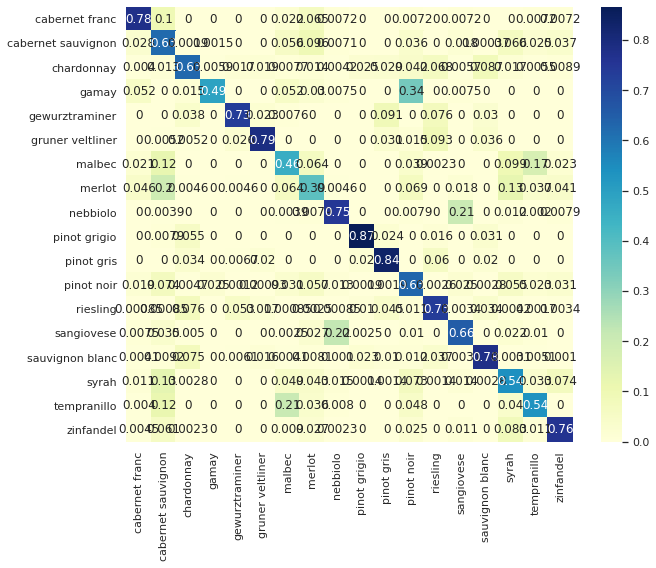

In [83]:
print_stats(y_test, prediction, pipe.classes_)


In [0]:
test_data=data_input

In [0]:
#dealing with imbalanced datset 

In [85]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE  
from imblearn.pipeline import Pipeline as imbPipeline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
clf = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7, 
                    n_estimators=300)
sm = SMOTE(random_state=42, sampling_strategy='auto')
pipe = imbPipeline([('feats', feats),
                    ('smote', sm),
                    ('clf',clf)
                 ])

In [87]:
pipe.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('feats',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('review_description',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  TextSelector(key='review_description')),
                                                                 ('vectorizer',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                                                  encodin

Accuracy = 0.632
----------------------------------------
Classification report:
                    precision    recall  f1-score   support

    cabernet franc       0.37      0.61      0.46       198
cabernet sauvignon       0.64      0.69      0.66      2170
        chardonnay       0.88      0.64      0.74      3773
             gamay       0.57      0.35      0.43       333
    gewurztraminer       0.44      0.62      0.52       175
  gruner veltliner       0.61      0.70      0.65       237
            malbec       0.38      0.43      0.40       567
            merlot       0.21      0.28      0.24       574
          nebbiolo       0.65      0.73      0.69       509
      pinot grigio       0.49      0.70      0.58       181
        pinot gris       0.45      0.65      0.53       235
        pinot noir       0.79      0.65      0.71      3838
          riesling       0.69      0.74      0.71      1144
        sangiovese       0.44      0.64      0.52       395
   sauvignon blanc

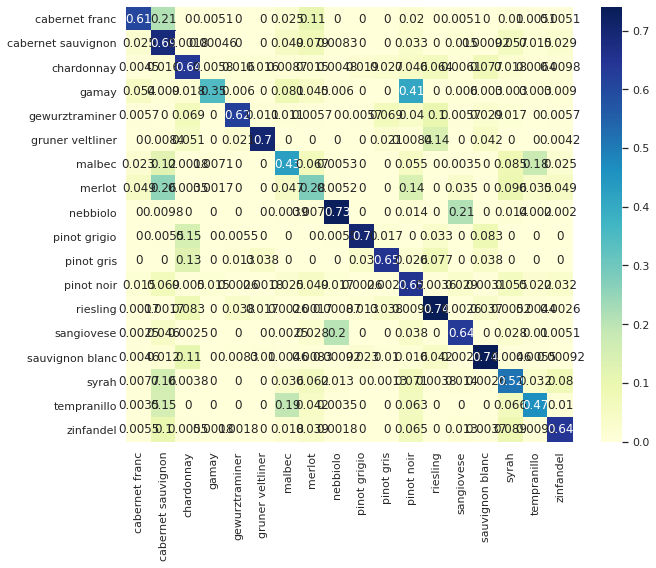

In [89]:
preds = pipe.predict(X_test)
print_stats(y_test, preds, pipe.classes_)

In [111]:
X_test.head()

,review_description,predictions
40180,"dusty, saffron-spiced earthiness is juxtaposed...",riesling
14840,strawberry tea and rose-petal aromas open this...,pinot noir
13383,the same bell as the well-known napa valley wi...,pinot gris
11679,this wine is nicely balanced and easy to drink...,sauvignon blanc
17800,"a sturdy cab with some hard, edgy tannins that...",cabernet sauvignon


In [0]:
X_test['predictions'] = preds
X_test.to_csv('drive/My Drive/Knight/Data/submission.csv')

In [0]:
param_grid = {
     'clf__n_estimators': [50,100,300]
}

In [0]:
grid_search = GridSearchCV(estimator = pipe, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [65]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [69]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
grid_search.fit(X_train, y_train)
